# Cohort Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import data

In [3]:
datafile = './search_cohort_raw.csv'
data = pd.read_csv(datafile)

## Find Initial Visit

In [4]:
# group data w.r.t user id
# index conversion useful for mapping first visits to user id
data.set_index('user_id', inplace=True)
user_grouped_data = data.groupby(by='user_id')
first_visits = user_grouped_data['date'].min()

# add first visits to the dataframe
# each different first visit day corresponds to a different cohort
data['cohort'] = first_visits
data.reset_index(inplace=True)
data = data.reindex(columns=['cohort', 'date', 'user_id'])
print(data)

           cohort        date                           user_id
0      2020-07-23  2020-07-23  002b74eac2cc17ed73924292af0c23f7
1      2020-07-23  2020-07-24  002b74eac2cc17ed73924292af0c23f7
2      2020-07-27  2020-07-27  008281f5fc74d8e48bc5943da22cb40c
3      2020-07-27  2020-07-28  008281f5fc74d8e48bc5943da22cb40c
4      2020-07-22  2020-07-22  009c33ce2d02aa8acaafc205eaf50a66
...           ...         ...                               ...
74183  2020-07-23  2020-07-23  fffeccf0cc61a3b9baf15ebf6edb59c9
74184  2020-07-23  2020-07-24  fffeccf0cc61a3b9baf15ebf6edb59c9
74185  2020-07-23  2020-07-25  fffeccf0cc61a3b9baf15ebf6edb59c9
74186  2020-07-23  2020-07-26  fffeccf0cc61a3b9baf15ebf6edb59c9
74187  2020-07-23  2020-07-27  fffeccf0cc61a3b9baf15ebf6edb59c9

[74188 rows x 3 columns]


## Build Cohorts

In [5]:
grouped_data = data.groupby(by=['cohort', 'date'])
cohorted_data = grouped_data.aggregate(
    {'user_id': pd.Series.nunique})  # returns a dataframe
cohorted_data.rename(columns={'user_id': 'user_count'}, inplace=True)
print(cohorted_data)

                       user_count
cohort     date                  
2020-07-22 2020-07-22        8355
           2020-07-23        4081
           2020-07-24        3051
           2020-07-25        3131
           2020-07-26        2922
           2020-07-27        2749
           2020-07-28        2319
           2020-07-29        2024
2020-07-23 2020-07-23        4882
           2020-07-24        2050
           2020-07-25        1876
           2020-07-26        1773
           2020-07-27        1468
           2020-07-28        1256
           2020-07-29        1053
2020-07-24 2020-07-24        3559
           2020-07-25        1744
           2020-07-26        1350
           2020-07-27        1113
           2020-07-28         964
           2020-07-29         790
2020-07-25 2020-07-25        3630
           2020-07-26        2059
           2020-07-27        1455
           2020-07-28        1100
           2020-07-29         904
2020-07-26 2020-07-26        2651
           202

## Convert to Table Form

In [6]:
cohorted_data.reset_index(inplace=True)
cohorted_data = cohorted_data.groupby(by='cohort')

# assign appropriate day number w.r.t the cohort


def assign_day_numbers(single_cohort):
    '''
    Given a cohort data frame, assign the day numbers
    '''
    single_cohort['date'] = list(range(1, len(single_cohort)+1))
    single_cohort.rename(columns={'date': 'day'}, inplace=True)
    return single_cohort


cohorted_data = cohorted_data.apply(assign_day_numbers)  # returns a dataframe
cohorted_data.index = pd.MultiIndex.from_frame(
    cohorted_data[['cohort', 'day']])
cohorted_data = cohorted_data[['user_count']]
cohorted_data = cohorted_data.unstack(1)
print(cohorted_data)

           user_count                                                        
day                 1       2       3       4       5       6       7       8
cohort                                                                       
2020-07-22     8355.0  4081.0  3051.0  3131.0  2922.0  2749.0  2319.0  2024.0
2020-07-23     4882.0  2050.0  1876.0  1773.0  1468.0  1256.0  1053.0     NaN
2020-07-24     3559.0  1744.0  1350.0  1113.0   964.0   790.0     NaN     NaN
2020-07-25     3630.0  2059.0  1455.0  1100.0   904.0     NaN     NaN     NaN
2020-07-26     2651.0  1584.0  1086.0   854.0     NaN     NaN     NaN     NaN
2020-07-27     1836.0  1304.0   839.0     NaN     NaN     NaN     NaN     NaN
2020-07-28     1188.0  1188.0     NaN     NaN     NaN     NaN     NaN     NaN


## Normalize the table

In [7]:
cohort_sizes = cohorted_data.loc[:, 'user_count'][1]
normalized_table = cohorted_data['user_count'].div(cohort_sizes, axis=0)*100
print(normalized_table)

day             1           2          3          4          5          6  \
cohort                                                                      
2020-07-22  100.0   48.845003  36.517056  37.474566  34.973070  32.902454   
2020-07-23  100.0   41.990987  38.426874  36.317083  30.069644  25.727161   
2020-07-24  100.0   49.002529  37.932003  31.272829  27.086260  22.197246   
2020-07-25  100.0   56.721763  40.082645  30.303030  24.903581        NaN   
2020-07-26  100.0   59.751037  40.965673  32.214259        NaN        NaN   
2020-07-27  100.0   71.023965  45.697168        NaN        NaN        NaN   
2020-07-28  100.0  100.000000        NaN        NaN        NaN        NaN   

day                 7          8  
cohort                            
2020-07-22  27.755835  24.225015  
2020-07-23  21.569029        NaN  
2020-07-24        NaN        NaN  
2020-07-25        NaN        NaN  
2020-07-26        NaN        NaN  
2020-07-27        NaN        NaN  
2020-07-28        NaN     

## Visualize the Data

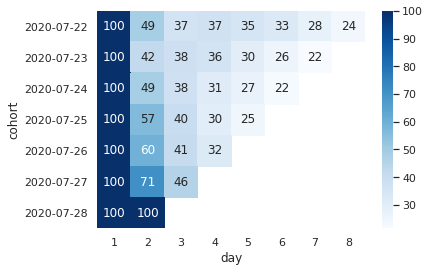

In [8]:
sns.set(style='white')
sns.heatmap(normalized_table, mask=normalized_table.isnull(),
            annot=True, fmt='.0f', cmap='Blues')
plt.show()